# Alkagolli ichimliklarni ko'p is'temol qilish mamlakatning havo haroratiga bog'liqmi?

## Gipoteza Climiti sovuq davlatlarda alkogolli ichimliklar ko'p iste'mol qilinadimi

In [1]:
# Kerakli kutubxonalarni chaqirib olamiz

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Datasetlarni yuklab olamiz 

In [2]:
# Source 1. https://datahub.io/five-thirty-eight/alcohol-consumption

# Ushbu datasetda 2010 - yildagi davlatlar kesimida kishi boshiga o'rtacha istemol miqdori ko'rsatilingan

df_drinks = pd.read_csv('drinks.csv')
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,afghanistan,0,0,0,0.0
1,albania,89,132,54,4.9
2,algeria,25,0,14,0.7
3,andorra,245,138,312,12.4
4,angola,217,57,45,5.9


In [3]:
# Source 2. https://www.kaggle.com/code/akshaychavan/average-temperature-per-country-per-year/data

# 2000 - 2013 yil oralig'idagi davlatlarda kuzatilingan o'rtacha haroratlar

df_temp = pd.read_csv('average_temprature.csv', index_col= 0)
df_temp.head()

,Åland,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,year.1
year,,,,,,,,,,,,,,,,,,,,,
2000,7.283333,15.497833,24.588083,13.746583,24.032250,27.219833,12.311917,22.360667,27.052750,NaN,...,17.756750,13.938833,25.388500,23.981917,26.730583,23.020083,27.436167,21.558750,21.149000,NaN
2001,6.401500,15.778083,24.841167,13.690417,24.724417,27.227583,12.216083,22.502917,27.408500,NaN,...,18.574250,13.998000,25.771333,24.184917,27.133167,23.704917,27.068917,21.802417,21.693667,NaN
2002,6.801083,15.537667,24.961333,13.559917,24.263000,27.537917,12.319583,22.925500,27.538250,NaN,...,17.993917,13.871917,25.772167,24.393750,27.297833,23.457833,27.125167,22.292417,22.081083,NaN
2003,6.323417,14.916000,25.025583,13.626583,24.393667,27.264833,12.900667,23.066583,27.677417,NaN,...,17.604667,13.157667,26.008333,24.497750,27.376583,23.408917,27.357750,22.156750,21.891250,NaN
2004,6.518667,15.770917,24.895917,13.258167,23.916000,27.281167,12.043000,22.572833,27.334000,NaN,...,18.060833,14.442000,25.817833,24.056917,27.029250,23.420667,27.334083,21.768083,21.330917,NaN


In [4]:
# Datasetlarda kerakli o'zgarishlarni amalga oshirib birlashtiramiz

df_temp = df_temp.T
df_temp.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Åland,7.283333,6.401500,6.801083,6.323417,6.518667,6.724083,7.100583,7.029000,7.492250,6.489083,4.861917,7.170750,6.063917,6.229750
Afghanistan,15.497833,15.778083,15.537667,14.916000,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Africa,24.588083,24.841167,24.961333,25.025583,24.895917,25.156167,24.818917,24.851500,24.754667,25.026500,25.472500,24.786500,24.725917,25.208750
Albania,13.746583,13.690417,13.559917,13.626583,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria,24.032250,24.724417,24.263000,24.393667,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500


In [5]:
# Bizda faqat 2010 - yil malumotlari kerak qolgan yillarni tashlab yuboramiz

df_temp_2010 = df_temp[[2010]]
df_temp_2010.head()

year,2010
Åland,4.861917
Afghanistan,15.828667
Africa,25.472500
Albania,13.775417
Algeria,25.215667


In [6]:
# Davlatlar nomini Umumiy ko'rinishga keltiramiz

df_temp_2010.index = [x.title() for x in df_temp_2010.index]
df_drinks.country = [y.title() for y in df_drinks.country]

In [7]:
list(df_temp_2010.index)

['Åland',
 'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 "Côte D'Ivoire",
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo (Democratic Republic Of The)',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark (Europe)',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial G

In [22]:
df_temp_2010['country'] = df_temp_2010.index
df_temp_2010.index = np.arange(1, 245)
df_temp_2010.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10328\2251155245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_2010['country'] = df_temp_2010.index


year,2010,country
1,4.861917,1
2,15.828667,2
3,25.472500,3
4,13.775417,4
5,25.215667,5


In [9]:
df_temp_2010.country

1               Åland
2         Afghanistan
3              Africa
4             Albania
5             Algeria
            ...      
240    Western Sahara
241             Yemen
242            Zambia
243          Zimbabwe
244            Year.1
Name: country, Length: 244, dtype: object

In [10]:
# Ikkita datasetni birlashtiramiz (Inner Join usulida)

data = pd.merge(df_drinks, df_temp_2010, how = 'outer', left_on= 'country', right_on='country')
data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,2010
0,Afghanistan,0.0,0.0,0.0,0.0,15.828667
1,Albania,89.0,132.0,54.0,4.9,13.775417
2,Algeria,25.0,0.0,14.0,0.7,25.215667
3,Andorra,245.0,138.0,312.0,12.4,11.480833
4,Angola,217.0,57.0,45.0,5.9,22.681500
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,NaN
6,Argentina,193.0,25.0,221.0,8.3,15.078833
7,Armenia,21.0,179.0,11.0,3.8,11.509500
8,Australia,261.0,72.0,212.0,10.4,22.078167
9,Austria,279.0,75.0,191.0,9.7,6.649083


## Datasetni tozalash va to'g'irlash ishlari

In [11]:
# barcha qiymatlari 0 qiymatga ega qatorlarni tashlab yuboramiz
data.columns = ['Country', 'Beer_servings', 'Spirit_servings', 'Wine_servings', 'Total_alcohol', 'Average_temp']
data.sort_values(by='Country')

data = data[(data['Beer_servings'] != 0) & (data['Spirit_servings'] != 0) & (data['Wine_servings'] !=0)
     & (data['Wine_servings'] != 0) & (data['Total_alcohol'] != 0)]

### Nan qiymatlarni -1 bilan tuldiramiz va filtirlaymiz

In [12]:
# 1. df_drink dan hosil bulgan nan qiymatlar 
data = data.fillna(-1)

pd.set_option('display.max_rows', None)

data_null = data[(data['Beer_servings'] == -1) | (data['Spirit_servings'] == -1) |(data['Country'] == -1)]
data_null

,Country,Beer_servings,Spirit_servings,Wine_servings,Total_alcohol,Average_temp
193,Åland,-1.0,-1.0,-1.0,-1.0,4.861917
194,Africa,-1.0,-1.0,-1.0,-1.0,25.472500
195,American Samoa,-1.0,-1.0,-1.0,-1.0,27.453417
196,Anguilla,-1.0,-1.0,-1.0,-1.0,27.856000
197,Antarctica,-1.0,-1.0,-1.0,-1.0,-1.000000
198,Antigua And Barbuda,-1.0,-1.0,-1.0,-1.0,27.735417
199,Aruba,-1.0,-1.0,-1.0,-1.0,28.968333
200,Asia,-1.0,-1.0,-1.0,-1.0,8.575583
201,Baker Island,-1.0,-1.0,-1.0,-1.0,26.205250
202,"Bonaire, Saint Eustatius And Saba",-1.0,-1.0,-1.0,-1.0,28.370583


In [13]:
# 2. Average temp jadvalidan xosil bo'lgan nan qiymatlar ikki jadvalni solishtirib ko'ramiz
data_temp_null = data[data['Average_temp'] == -1]
data_temp_null

,Country,Beer_servings,Spirit_servings,Wine_servings,Total_alcohol,Average_temp
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,-1.0
21,Bosnia-Herzegovina,76.0,173.0,8.0,4.6,-1.0
24,Brunei,31.0,2.0,1.0,0.6,-1.0
28,Cote D'Ivoire,37.0,1.0,7.0,4.0,-1.0
29,Cabo Verde,144.0,56.0,16.0,4.0,-1.0
47,Dr Congo,32.0,3.0,1.0,2.3,-1.0
71,Guinea-Bissau,28.0,31.0,21.0,2.5,-1.0
110,Micronesia,62.0,50.0,18.0,2.3,-1.0
141,Russian Federation,247.0,326.0,73.0,11.5,-1.0
143,St. Kitts & Nevis,194.0,205.0,32.0,7.7,-1.0


In [14]:
# Datalarni moslab chiqamiz. (Ba'zi qatorlarda 'and' o'rniga & ishlatilindi loop
# orqali ham amalga oshirish mumkin edi lekin bunday qatorlar soni kam bo'lgani
# uchun bunga ehtiyoj qolmadi)

# Russia
data.loc[[141],['Country']] = 'Russia'
data.loc[[141],['Average_temp']] = data[data.index == 246]['Average_temp'][246]

# Bosnia & Herzegovina
data.loc[[21],['Country']] = 'Bosnia & Herzegovina'
data.loc[[21],['Average_temp']] = data[data.index == 203]['Average_temp'][203]

# Cote D'Ivoire
data.loc[[28],['Average_temp']] = data[data.index == 206]['Average_temp'][206]

# Congo
data.loc[[47],['Country']] = 'Congo'
data.loc[[47],['Average_temp']] = data[data.index == 210]['Average_temp'][210]

# Cabo Verde
data.loc[[29],['Average_temp']] = data[data.index == 207]['Average_temp'][207]

# Antigua & Barbuda
data.loc[[5],['Average_temp']] = data[data.index == 198]['Average_temp'][198]

# Sao Tome And Principe
data.loc[[148],['Average_temp']] = data[data.index == 253]['Average_temp'][253]

# Timor Leste
data.loc[[171],['Country']] = 'Timor Leste'
data.loc[[171],['Average_temp']] = data[data.index == 259]['Average_temp'][259]

# Trinidad & Tobago
data.loc[[174],['Average_temp']] = data[data.index == 260]['Average_temp'][260]

# United States
data.loc[[184],['Country']] = 'United States'
data.loc[[184],['Average_temp']] = data[data.index == 263]['Average_temp'][263]

In [15]:
# -1 (Nan) qiymatlarni tashlab yuboramiz

data = data[(data['Beer_servings'] != -1) & (data['Average_temp'] != -1)]
data

,Country,Beer_servings,Spirit_servings,Wine_servings,Total_alcohol,Average_temp
1,Albania,89.0,132.0,54.0,4.9,13.775417
3,Andorra,245.0,138.0,312.0,12.4,11.480833
4,Angola,217.0,57.0,45.0,5.9,22.681500
5,Antigua & Barbuda,102.0,128.0,45.0,4.9,27.735417
6,Argentina,193.0,25.0,221.0,8.3,15.078833
7,Armenia,21.0,179.0,11.0,3.8,11.509500
8,Australia,261.0,72.0,212.0,10.4,22.078167
9,Austria,279.0,75.0,191.0,9.7,6.649083
10,Azerbaijan,21.0,46.0,5.0,1.3,13.962667
11,Bahamas,122.0,176.0,51.0,6.3,25.229167


In [16]:
# Reindexlaymiz

data.index = data['Country']
del data['Country']
data

,Beer_servings,Spirit_servings,Wine_servings,Total_alcohol,Average_temp
Country,,,,,
Albania,89.0,132.0,54.0,4.9,13.775417
Andorra,245.0,138.0,312.0,12.4,11.480833
Angola,217.0,57.0,45.0,5.9,22.681500
Antigua & Barbuda,102.0,128.0,45.0,4.9,27.735417
Argentina,193.0,25.0,221.0,8.3,15.078833
Armenia,21.0,179.0,11.0,3.8,11.509500
Australia,261.0,72.0,212.0,10.4,22.078167
Austria,279.0,75.0,191.0,9.7,6.649083
Azerbaijan,21.0,46.0,5.0,1.3,13.962667


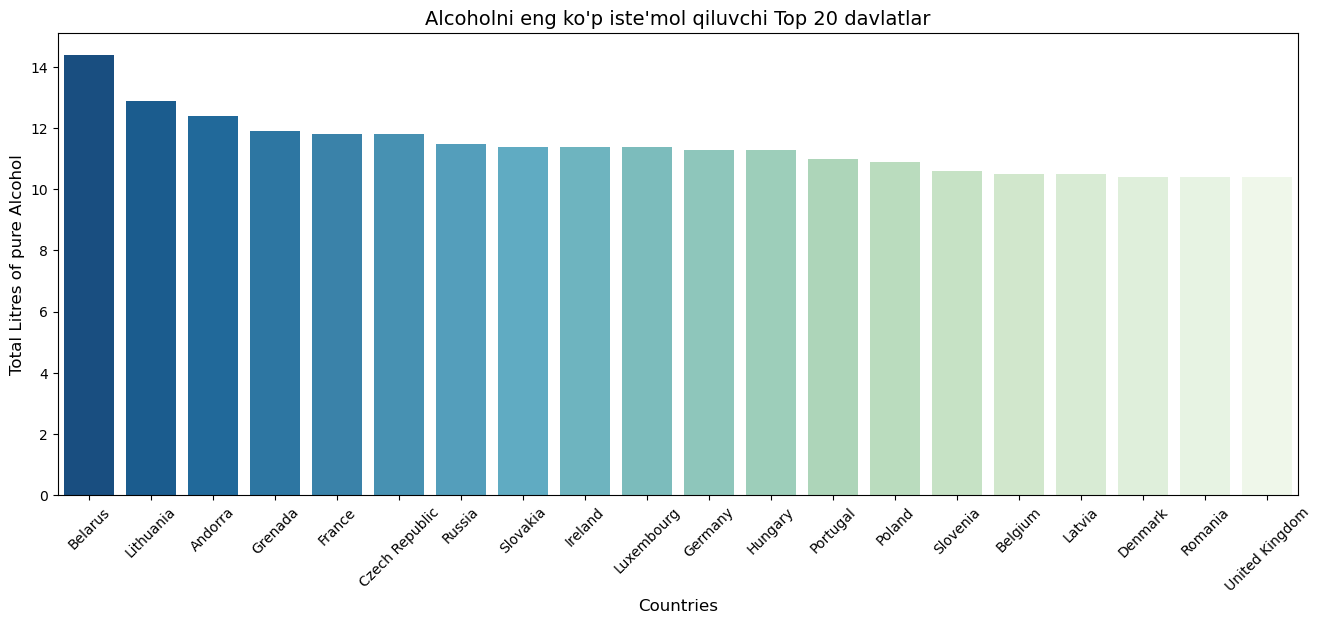

In [17]:
plt.figure(figsize=(16,6))

plt.xticks(rotation = 45)
sns.barplot(y = data.sort_values('Total_alcohol', ascending=False)['Total_alcohol'][:20],
            x = data.sort_values('Total_alcohol', ascending=False).index[:20],
            data = data,
            palette = 'GnBu_r')


plt.title("Alcoholni eng ko'p iste'mol qiluvchi Top 20 davlatlar", fontsize = 14)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Total Litres of pure Alcohol", fontsize = 12)

plt.show()

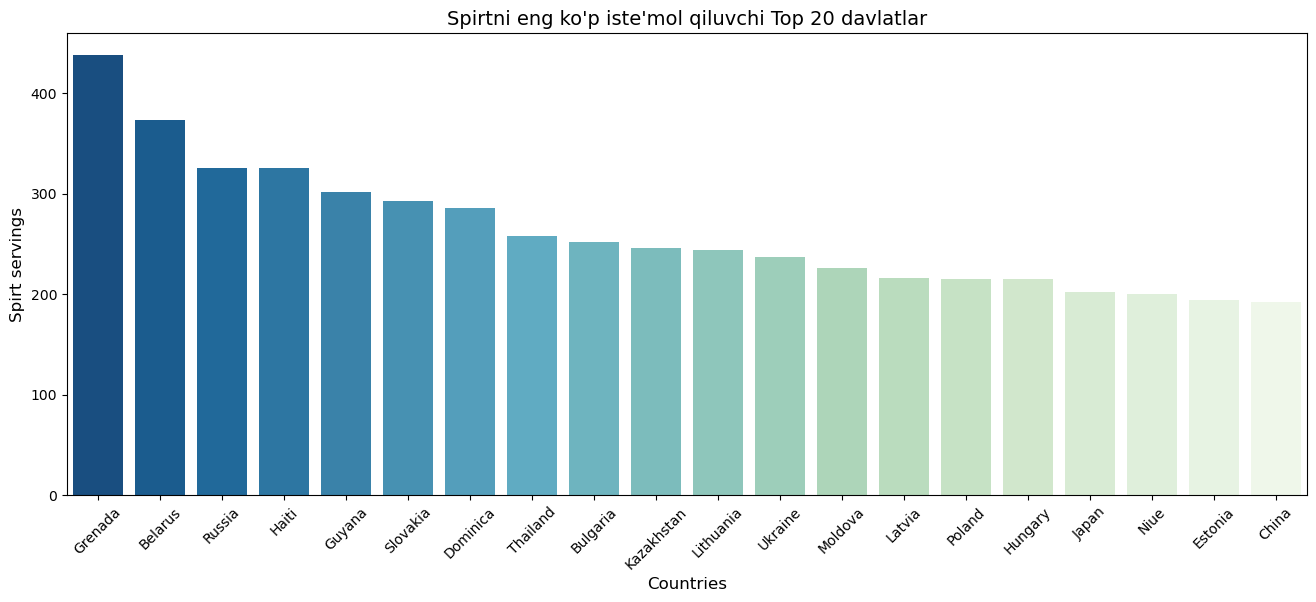

In [18]:
plt.figure(figsize=(16,6))

plt.xticks(rotation = 45)
sns.barplot(y = data.sort_values('Spirit_servings', ascending=False)['Spirit_servings'][:20],
            x = data.sort_values('Spirit_servings', ascending=False).index[:20],
            data = data,
            palette = 'GnBu_r')


plt.title("Spirtni eng ko'p iste'mol qiluvchi Top 20 davlatlar", fontsize = 14)
plt.xlabel("Countries", fontsize = 12)
plt.ylabel("Spirt servings", fontsize = 12)

plt.show()

###  Yuqoridagi 2 ta barplotda top 20 ta Alcohol hamda Spirtli ichimliklar iste'mol qiluvchi davlatlarni ko'rish mumkin. Aksaryat davlatlar Yevropada joylashganligini va u yerda havo harorati past bo'lishini inobatga olsak Sovuq Climit li davlatlarda alcohol iste'moli yuqori ekanligini ko'rish mumkin.

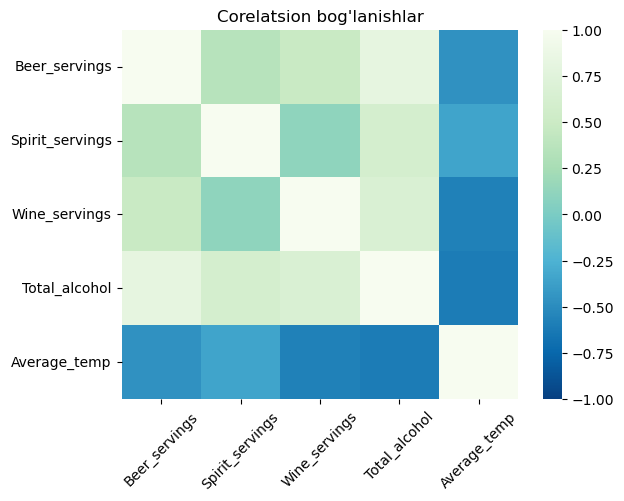

In [19]:
plt.title("Corelatsion bog'lanishlar")
sns.heatmap(data.corr(),
            cmap= 'GnBu_r',
            vmin= -1)
plt.xticks(rotation = 45)

plt.show()

In [20]:
# Correlatsion bog'lanishni ko'ramiz

data.corrwith(data.Average_temp)

Beer_servings     -0.468293
Spirit_servings   -0.345345
Wine_servings     -0.571176
Total_alcohol     -0.605025
Average_temp       1.000000
dtype: float64

### Average_temp hamda boshqa ustunlar Correlatsidan negativ bog'lanishni ko'rish mumkin ya'ni Climit pasaygan sari iste'mol ko'paygan degan xulosa qilish mumkin. Shuningdek Wine_servings, Total_alcohol ustunlarining Average_temp ustuni bilan kuchli negativ correlatsiyasini ko'rish mumkin. Xulosa sifatida hipotezaning o'rinli ekanligini ko'rishimiz mumkin.

In [21]:
# So'ngi natijani saqlab olamiz

data.to_csv('Last_output.csv')